# Palleja & Suez species baseline random forest, using interpolated data!!!
## Using vegdist (Bray-Curtis). Both studies from NGless result and rarefied to 190!
## LHS is distance * day, not distance!!

## 1. Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/Users/Jessica/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
species = pd.read_csv("/Users/Jessica/Documents/Lab/Multiple_longitudinal/Microbe_resilience/Interpolate_missing_timepoint/Palleja_Suez_both_ngless_rarefy190_species_baseline_vegdist_bray_interpolated_forML.txt",
                   delimiter = "\t")

In [3]:
species.head()

,Sample_id,recovered_day,lowest_dist,DistxDay,Perturbance_scale,Sample,Day,Study,Shannon,Akkermansia.muciniphila._Akkermansia.muciniphila.CAG.154_Akkermansia.sp..UNK.MGS.1_Akkermansia.sp..54_46_Akkermansia.sp..Phil8_Akkermansia.muciniphila_,...,Veillonella.parvula._Veillonella.parvula_Veillonella.sp..6_1_27_Veillonella.sp..3_1_44_,X_Eubacterium_.eligens._Candidatus.Gastranaerophilales.bacterium.HUM_14__Eubacterium_.eligens_,X_Eubacterium_.eligens._Eubacterium.eligens.CAG.72_Candidatus.Gastranaerophilales.bacterium.HUM_19__Eubacterium_.eligens_,X_Eubacterium_.hallii._Eubacterium.hallii.CAG.12_uncultured.Eubacterium.sp.__Eubacterium_.hallii_,X_Eubacterium_.rectale._Eubacterium.rectale.CAG.36_Eubacterium.sp..41_20__Eubacterium_.rectale_,X_Eubacterium_.siraeum._Eubacterium.siraeum.CAG.80__Eubacterium_.siraeum_,X_Ruminococcus_.torques,bacterium.LF.3._Coprobacillus.sp..CAG.235_bacterium.LF.3_Coprobacillus.sp..CAG.235_29_27_uncultured.Clostridium.sp._,uncultured.Blautia.sp.,uncultured.Clostridium.sp.
0,801,62,0.517857,32.107143,0.808989,801_0,0,Suez,2.686103,0,...,0,0,0,0,0,0,0,0,0,0
1,802,20,0.333333,6.666667,0.584795,802_0,0,Suez,2.198851,0,...,0,1,2,0,0,0,1,1,0,0
2,803,52,0.284810,14.810127,0.486567,803_0,0,Suez,2.867593,0,...,0,0,3,0,1,0,0,0,0,0
3,804,53,0.285714,15.142857,0.616099,804_0,0,Suez,3.256259,0,...,0,1,8,0,2,0,2,0,0,3
4,805,55,0.680982,37.453988,0.840256,805_0,0,Suez,2.827919,0,...,0,2,0,0,4,1,6,0,0,0


## 2. Set up evaluation environment. Use stratified 5-fold CV to determine the accuracy of the model

In [4]:
my_data = species.drop(columns=['recovered_day', 'lowest_dist', 'Sample', 'Day', 'Study'])

In [5]:
my_data.head()

,Sample_id,DistxDay,Perturbance_scale,Shannon,Akkermansia.muciniphila._Akkermansia.muciniphila.CAG.154_Akkermansia.sp..UNK.MGS.1_Akkermansia.sp..54_46_Akkermansia.sp..Phil8_Akkermansia.muciniphila_,Alistipes.finegoldii._Alistipes.finegoldii.CAG.68_Alistipes.finegoldii_Alistipes.sp..HGB5_,Alistipes.finegoldii_onderdonkii._Alistipes.sp..CAG.29_Alistipes.sp..AL.1_Alistipes.finegoldii_Alistipes.onderdonkii_,Alistipes.obesi,Alistipes.putredinis._Alistipes.putredinis.CAG.67_Alistipes.putredinis_,Alistipes.shahii._Alistipes.sp..56_sp_Nov_56_25_Alistipes.shahii_,...,Veillonella.parvula._Veillonella.parvula_Veillonella.sp..6_1_27_Veillonella.sp..3_1_44_,X_Eubacterium_.eligens._Candidatus.Gastranaerophilales.bacterium.HUM_14__Eubacterium_.eligens_,X_Eubacterium_.eligens._Eubacterium.eligens.CAG.72_Candidatus.Gastranaerophilales.bacterium.HUM_19__Eubacterium_.eligens_,X_Eubacterium_.hallii._Eubacterium.hallii.CAG.12_uncultured.Eubacterium.sp.__Eubacterium_.hallii_,X_Eubacterium_.rectale._Eubacterium.rectale.CAG.36_Eubacterium.sp..41_20__Eubacterium_.rectale_,X_Eubacterium_.siraeum._Eubacterium.siraeum.CAG.80__Eubacterium_.siraeum_,X_Ruminococcus_.torques,bacterium.LF.3._Coprobacillus.sp..CAG.235_bacterium.LF.3_Coprobacillus.sp..CAG.235_29_27_uncultured.Clostridium.sp._,uncultured.Blautia.sp.,uncultured.Clostridium.sp.
0,801,32.107143,0.808989,2.686103,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,802,6.666667,0.584795,2.198851,0,0,0,0,1,0,...,0,1,2,0,0,0,1,1,0,0
2,803,14.810127,0.486567,2.867593,0,0,0,0,0,0,...,0,0,3,0,1,0,0,0,0,0
3,804,15.142857,0.616099,3.256259,0,0,0,0,0,0,...,0,1,8,0,2,0,2,0,0,3
4,805,37.453988,0.840256,2.827919,0,0,0,0,0,0,...,0,2,0,0,4,1,6,0,0,0


In [6]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5)

## Step 3: Try out Random Forest (within the 5 - Fold CV setup)

In [7]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5)

In [8]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from collections import OrderedDict

In [9]:
seed = 42

In [10]:
X, y = my_data.drop(columns=['Sample_id', 'DistxDay']), my_data.DistxDay

In [11]:
X.head()

,Perturbance_scale,Shannon,Akkermansia.muciniphila._Akkermansia.muciniphila.CAG.154_Akkermansia.sp..UNK.MGS.1_Akkermansia.sp..54_46_Akkermansia.sp..Phil8_Akkermansia.muciniphila_,Alistipes.finegoldii._Alistipes.finegoldii.CAG.68_Alistipes.finegoldii_Alistipes.sp..HGB5_,Alistipes.finegoldii_onderdonkii._Alistipes.sp..CAG.29_Alistipes.sp..AL.1_Alistipes.finegoldii_Alistipes.onderdonkii_,Alistipes.obesi,Alistipes.putredinis._Alistipes.putredinis.CAG.67_Alistipes.putredinis_,Alistipes.shahii._Alistipes.sp..56_sp_Nov_56_25_Alistipes.shahii_,Anaerostipes.hadrus._Lachnospiraceae.bacterium.CAG.25_Firmicutes.bacterium.CAG.552_39_19_Clostridiales.bacterium.Nov_37_41_Clostridium.sp..SS2_1_Anaerostipes.hadrus_Lachnospiraceae.bacterium.5_1_63FAA_,Anaerostipes.hadrus._uncultured.Eubacterium.sp._Anaerostipes.hadrus_,...,Veillonella.parvula._Veillonella.parvula_Veillonella.sp..6_1_27_Veillonella.sp..3_1_44_,X_Eubacterium_.eligens._Candidatus.Gastranaerophilales.bacterium.HUM_14__Eubacterium_.eligens_,X_Eubacterium_.eligens._Eubacterium.eligens.CAG.72_Candidatus.Gastranaerophilales.bacterium.HUM_19__Eubacterium_.eligens_,X_Eubacterium_.hallii._Eubacterium.hallii.CAG.12_uncultured.Eubacterium.sp.__Eubacterium_.hallii_,X_Eubacterium_.rectale._Eubacterium.rectale.CAG.36_Eubacterium.sp..41_20__Eubacterium_.rectale_,X_Eubacterium_.siraeum._Eubacterium.siraeum.CAG.80__Eubacterium_.siraeum_,X_Ruminococcus_.torques,bacterium.LF.3._Coprobacillus.sp..CAG.235_bacterium.LF.3_Coprobacillus.sp..CAG.235_29_27_uncultured.Clostridium.sp._,uncultured.Blautia.sp.,uncultured.Clostridium.sp.
0,0.808989,2.686103,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.584795,2.198851,0,0,0,0,1,0,1,0,...,0,1,2,0,0,0,1,1,0,0
2,0.486567,2.867593,0,0,0,0,0,0,1,0,...,0,0,3,0,1,0,0,0,0,0
3,0.616099,3.256259,0,0,0,0,0,0,1,0,...,0,1,8,0,2,0,2,0,0,3
4,0.840256,2.827919,0,0,0,0,0,0,0,3,...,0,2,0,0,4,1,6,0,0,0


In [12]:
# All the methods to be compared
ensemble_clfs = [
    ("RF, max_features='sqrt', max_depth = 2",
       RandomForestRegressor(random_state=seed, max_depth=2,
                            oob_score=True, max_features = "sqrt")),
    ("RF, max_features='sqrt', max_depth = 5",
       RandomForestRegressor(random_state=seed, max_depth=5, 
                            oob_score=True, max_features = "sqrt")),
    ("RF, max_features='sqrt', max_depth = 10",
       RandomForestRegressor(random_state=seed, max_depth=10, 
                            oob_score=True, max_features = "sqrt")),
    ("RF, max_features='log2', max_depth = 2",
       RandomForestRegressor(random_state=seed, max_depth=2, 
                            oob_score=True, max_features = "log2")),
    ("RF, max_features='log2', max_depth = 5",
       RandomForestRegressor(random_state=seed, max_depth=5, 
                            oob_score=True, max_features = "log2")),
    ("RF, max_features='log2', max_depth = 10",
       RandomForestRegressor(random_state=seed, max_depth=10,
                            oob_score=True, max_features = "log2"))
     ]

In [13]:
# OOB error
# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 25
max_estimators = 1800

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1, 25):
        clf.set_params(n_estimators=i, n_jobs = 2)
        clf.fit(X, y)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

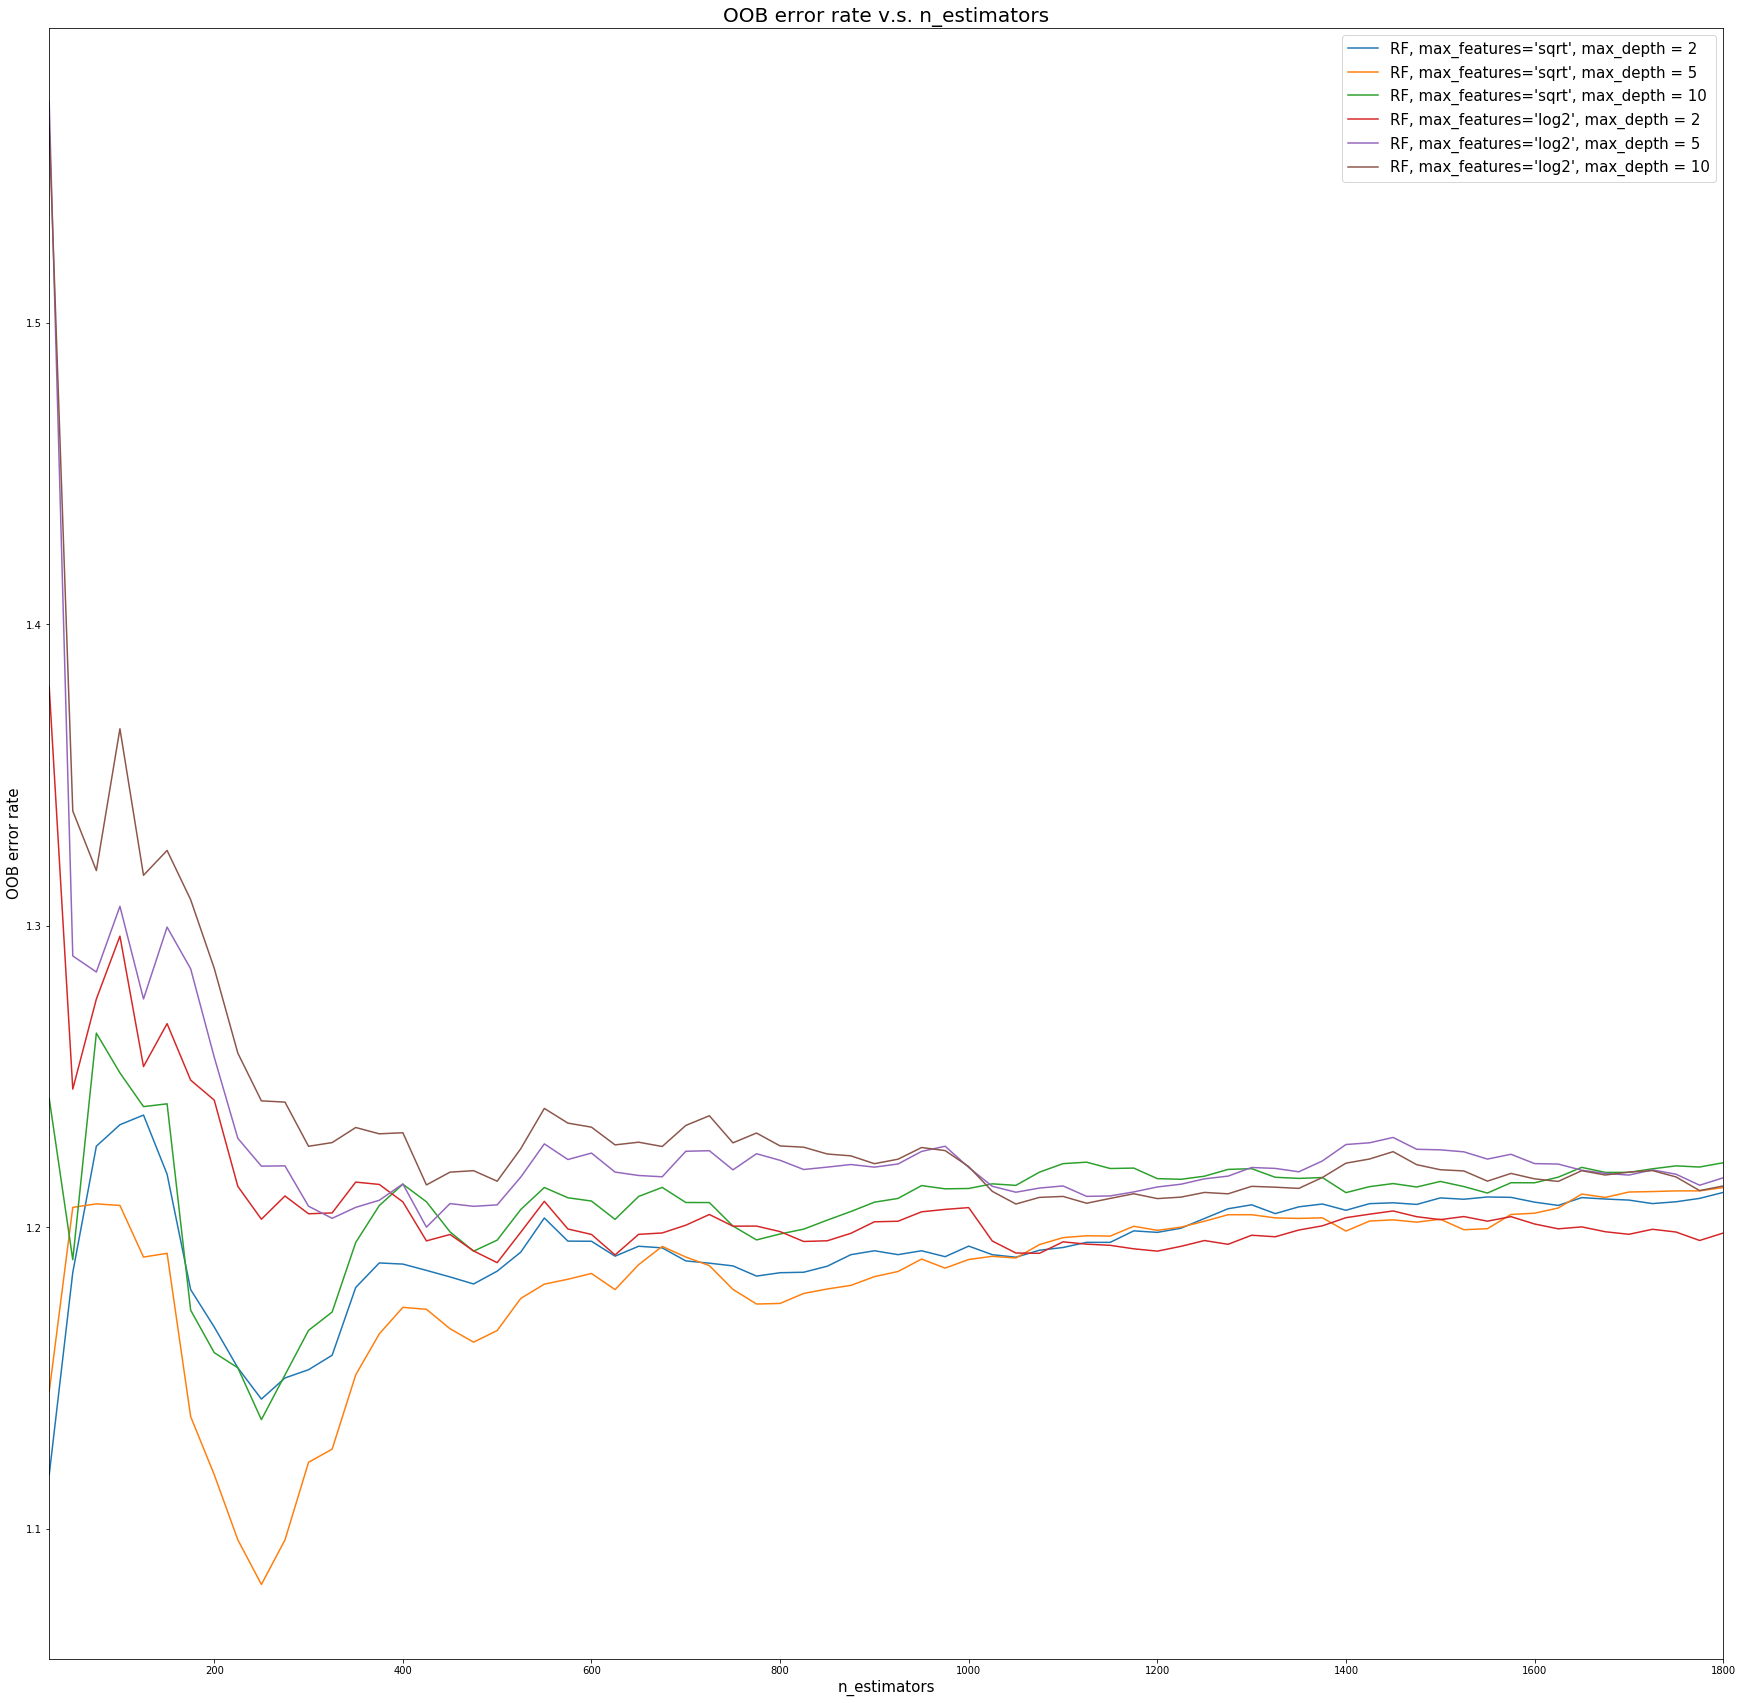

In [15]:
# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)
plt.rcParams["figure.figsize"] = [40, 40]
plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators", fontsize = 15)
plt.ylabel("OOB error rate", fontsize = 15)
plt.legend(loc="upper right", fontsize = 15)
plt.title("OOB error rate v.s. n_estimators", fontsize = 20)
plt.show()

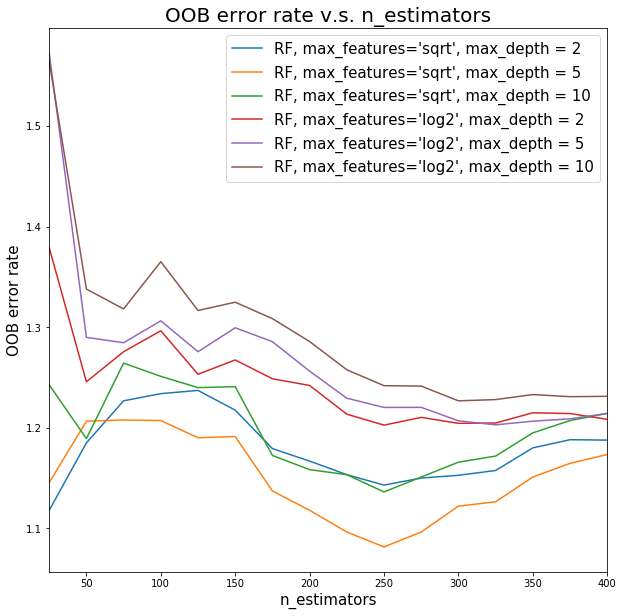

In [18]:
# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)
plt.rcParams["figure.figsize"] = [10, 10]
plt.xlim(25, 400)
plt.xlabel("n_estimators", fontsize = 15)
plt.ylabel("OOB error rate", fontsize = 15)
plt.legend(loc="upper right", fontsize = 15)
plt.title("OOB error rate v.s. n_estimators", fontsize = 20)
plt.show()

**From the plot above, we can see that the blue line at 250 estimators is the best**

In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
import random
import math
seed = 42
X, y = my_data.drop(columns=['Sample_id', 'DistxDay']), my_data.DistxDay
kf = KFold(n_splits=5)

In [27]:
# Max_depth = 5, max_features = "sqrt"
RF_1 = RandomForestRegressor(random_state=seed, max_depth=5, n_estimators= 250, 
                            oob_score=True, max_features = "sqrt")
result_negMSE_1 = cross_val_score(RF_1, X, y, cv = kf, scoring="neg_mean_absolute_error")
print("Avg kfold neg MSE: {}".format(result_negMSE_1.mean())) #Print average accuracy
output = cross_validate(RF_1, X, y, cv=kf, scoring = 'neg_mean_absolute_error', return_estimator =True)

Avg kfold neg MSE: -35.42277879905041


### Calculate the feature importance per fold

In [28]:
# Get feature importance per estimator
feature_result = []
for idx, estimator in enumerate(output['estimator']):
    print("Features sorted by their score for estimator {}:".format(idx))
    feature_importances = pd.DataFrame(estimator.feature_importances_, index = X.columns, 
                                       columns=['importance']).sort_values('importance', ascending=False)
    feature_result.append((feature_importances)) # Save the result in each loop to feature_result
    #print(feature_importances)


Features sorted by their score for estimator 0:
Features sorted by their score for estimator 1:
Features sorted by their score for estimator 2:
Features sorted by their score for estimator 3:
Features sorted by their score for estimator 4:


In [29]:
type(feature_result)

list

In [30]:
feature_result_1 = pd.DataFrame(feature_result[0])
feature_result_2 = pd.DataFrame(feature_result[1])
feature_result_3 = pd.DataFrame(feature_result[2])
feature_result_4 = pd.DataFrame(feature_result[3])
feature_result_5 = pd.DataFrame(feature_result[4])
feature_result_all = pd.concat([feature_result_1, feature_result_2, feature_result_3, 
                              feature_result_4, feature_result_5])

In [31]:
feature_result_all

,importance
Ruminococcus.bromii._Ruminococcus.sp..CAG.108_Ruminococcus.sp..A254.MGS.108_uncultured.Ruminococcus.sp._Ruminococcus.sp..CAG.108.related_41_35_Ruminococcus.bromii_,0.046094
Clostridiales.sp.._Clostridium.sp..CAG.264_Clostridium.sp..L2.50_uncultured.Coprococcus.sp._,0.040056
X_Eubacterium_.rectale._Eubacterium.rectale.CAG.36_Eubacterium.sp..41_20__Eubacterium_.rectale_,0.034194
Prevotella.copri._Prevotella.copri.CAG.164_Prevotella.copri_,0.033233
Bacteroides.sp.._Bacteroides.sp..HMSC073E02_Bacteroides.ovatus_Bacteroides.xylanisolvens_Bacteroides.sp..1_1_30_Bacteroides.sp..3_1_13_Bacteroides.sp..3_1_23_Bacteroides.sp..2_1_22_Bacteroides.sp..2_2_4_Bacteroides.sp..D1_Bacteroides.sp..D2_Bacteroides.sp..D22_Bacteroides.fragilis_,0.032020
...,...
Coprococcus.catus,0.000059
Clostridium.sp..CAG.217,0.000028
Clostridium.sp..CAG.288,0.000013
Bifidobacterium.animalis,0.000010


In [32]:
# Turn rownames to colum
feature_result_all.index.name = 'Feature'
feature_result_all.reset_index(inplace=True)
feature_result_all.head(10)


,Feature,importance
0,Ruminococcus.bromii._Ruminococcus.sp..CAG.108_...,0.046094
1,Clostridiales.sp.._Clostridium.sp..CAG.264_Clo...,0.040056
2,X_Eubacterium_.rectale._Eubacterium.rectale.CA...,0.034194
3,Prevotella.copri._Prevotella.copri.CAG.164_Pre...,0.033233
4,Bacteroides.sp.._Bacteroides.sp..HMSC073E02_Ba...,0.032020
5,Dialister.sp..CAG.486,0.028828
6,Faecalibacterium.species.incertae.sedis,0.028085
7,Bacteroides.dorei_vulgatus._Bacteroidia.bacter...,0.027289
8,Faecalibacterium.prausnitzii._uncultured.Faeca...,0.027199
9,Ruminococcaceae.species.incertae.sedis,0.024194


In [41]:
# Select only the top 10 important features for plotting
feature_result_all.sort_values(by = "importance", ascending=False, inplace=True)

# Group features and compute the median of each group 
#https://www.kite.com/python/answers/how-to-group-a-pandas-dataframe-by-a-column-and-compute-the-mean-of-each-group-in-python
grouped_feature_result_all = feature_result_all.groupby("Feature")
mean_feature = grouped_feature_result_all.median()
mean_feature = mean_feature.reset_index() #reset index to match format

# Sort by importance
mean_feature.sort_values(by = "importance", ascending=False, inplace=True)
mean_feature.head(10)

,Feature,importance
122,X_Eubacterium_.rectale._Eubacterium.rectale.CA...,0.031262
106,Ruminococcus.bromii._Ruminococcus.sp..CAG.108_...,0.031033
34,Clostridiales.sp.._Clostridium.sp..CAG.264_Clo...,0.030657
92,Prevotella.copri._Prevotella.copri.CAG.164_Pre...,0.028296
65,Faecalibacterium.prausnitzii._uncultured.Faeca...,0.027059
91,Perturbance_scale,0.026569
102,Roseburia.sp.._Roseburia.sp..CAG.45_uncultured...,0.026398
53,Dialister.sp..CAG.486,0.026197
13,Bacteroides.faecis_thetaiotaomicron._Bacteroid...,0.026122
66,Faecalibacterium.sp.._Faecalibacterium.sp..CAG...,0.025299


In [35]:
mean_feature.loc[122, ][0]

'X_Eubacterium_.rectale._Eubacterium.rectale.CAG.36_Eubacterium.sp..41_20__Eubacterium_.rectale_'

In [34]:
feature_plotting = feature_result_all.loc[feature_result_all['Feature'].isin
                                          ([mean_feature.loc[122, ][0], mean_feature.loc[106, ][0],
                                           mean_feature.loc[34, ][0], mean_feature.loc[92, ][0],
                                           mean_feature.loc[65, ][0], mean_feature.loc[91, ][0],
                                           mean_feature.loc[102, ][0], mean_feature.loc[53, ][0],
                                           mean_feature.loc[13, ][0], mean_feature.loc[66, ][0]])]
feature_plotting.head()

,Feature,importance
385,Bacteroides.faecis_thetaiotaomicron._Bacteroid...,0.047877
0,Ruminococcus.bromii._Ruminococcus.sp..CAG.108_...,0.046094
257,Prevotella.copri._Prevotella.copri.CAG.164_Pre...,0.044290
1,Clostridiales.sp.._Clostridium.sp..CAG.264_Clo...,0.040056
513,Perturbance_scale,0.037413


In [36]:
# Manually sort the plotting order
order_list = [mean_feature.loc[122, ][0], mean_feature.loc[106, ][0],
                                           mean_feature.loc[34, ][0], mean_feature.loc[92, ][0],
                                           mean_feature.loc[65, ][0], mean_feature.loc[91, ][0],
                                           mean_feature.loc[102, ][0], mean_feature.loc[53, ][0],
                                           mean_feature.loc[13, ][0], mean_feature.loc[66, ][0]]

In [37]:
order_list

['X_Eubacterium_.rectale._Eubacterium.rectale.CAG.36_Eubacterium.sp..41_20__Eubacterium_.rectale_',
 'Ruminococcus.bromii._Ruminococcus.sp..CAG.108_Ruminococcus.sp..A254.MGS.108_uncultured.Ruminococcus.sp._Ruminococcus.sp..CAG.108.related_41_35_Ruminococcus.bromii_',
 'Clostridiales.sp.._Clostridium.sp..CAG.264_Clostridium.sp..L2.50_uncultured.Coprococcus.sp._',
 'Prevotella.copri._Prevotella.copri.CAG.164_Prevotella.copri_',
 'Faecalibacterium.prausnitzii._uncultured.Faecalibacterium.sp._Faecalibacterium.prausnitzii_',
 'Perturbance_scale',
 'Roseburia.sp.._Roseburia.sp..CAG.45_uncultured.Roseburia.sp._',
 'Dialister.sp..CAG.486',
 'Bacteroides.faecis_thetaiotaomicron._Bacteroides.sp..HMSC067B03_Bacteroides.sp..HMSC068A09_Bacteroides.sp..1_1_14_Bacteroides.faecis_Bacteroides.thetaiotaomicron_Bacteroides.sp..AR20_',
 'Faecalibacterium.sp.._Faecalibacterium.sp..CAG.74_Faecalibacterium.sp..CAG.74_58_120_']

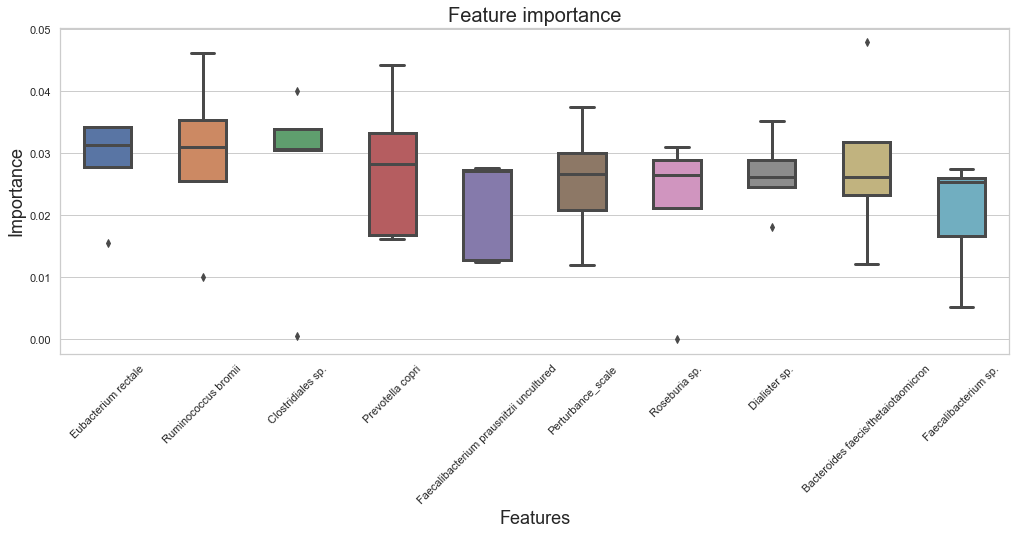

In [38]:
# Plot boxplot to see the variation of feature importance across folds 
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(17,6)})
sns.set_style("whitegrid")
a = sns.boxplot(x=feature_plotting["Feature"], y=feature_plotting["importance"], 
                width=0.5, linewidth=3, order = order_list)
a.axes.set_title("Feature importance",fontsize=20)
a.set_xlabel("Features",fontsize=18)
a.set_ylabel("Importance",fontsize=18)
a.set_xticklabels(a.get_xticklabels(),rotation = 45)
a.set_xticklabels(["Eubacterium rectale", "Ruminococcus bromii",
                  "Clostridiales sp.", "Prevotella copri",
                  "Faecalibacterium prausnitzii uncultured", 
                  "Perturbance_scale", "Roseburia sp.", 
                  "Dialister sp.", "Bacteroides faecis/thetaiotaomicron", 
                  "Faecalibacterium sp."])
plt.show()


## Step 4: Try out linear regression (within the 5 - Fold CV setup)

In [54]:
#Scaling needs to be done per fold
#Sklearn has quite useful package called pipeline where you can run scaling and classifier per fold
from sklearn.model_selection import LeaveOneOut
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore") #Suppress warnings
seed = 42

X, y = my_data.drop(columns=['Sample_id', 'DistxDay']), my_data.DistxDay
raw_scaler = StandardScaler()
raw_scaler.fit(X)
X_scaled = raw_scaler.transform(X)

## Codes below are from https://www.kaggle.com/jnikhilsai/cross-validation-with-linear-regression

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import LeaveOneOut
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = seed)

# Find the best hyperparameters first
# specify range of hyperparameters
hyper_params = [{'n_features_to_select': list(range(1, 60))}]

# specify model
lm = LinearRegression()
lm.fit(X_scaled, y)
rfe = RFE(lm)             

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_scaled, y)                  

Fitting 5 folds for each of 59 candidates, totalling 295 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22, 23,
                                                   24, 25, 26, 27, 28, 29, 30, ...]}],
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [56]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.061959,0.008073,0.000321,0.000133,1,{'n_features_to_select': 1},-42.174233,-31.804951,-41.280497,-22.576773,...,-36.164388,7.905038,44,-25.872477,-16.852635,-16.725375,-19.319949,-21.066177,-19.967323,3.367757
1,0.055350,0.000726,0.000196,0.000011,2,{'n_features_to_select': 2},-38.486580,-31.804951,-43.274778,-33.163169,...,-36.946714,4.105766,46,-17.022108,-10.386229,-13.763197,-17.848293,-12.423872,-14.288740,2.797329
2,0.056631,0.003023,0.000221,0.000037,3,{'n_features_to_select': 3},-35.669831,-31.804951,-40.897114,-43.601956,...,-41.071739,7.390520,47,-11.067420,-10.386229,-13.024427,-11.635729,-9.363439,-11.095449,1.226091
3,0.057258,0.001231,0.000249,0.000032,4,{'n_features_to_select': 4},-35.095219,-34.003790,-39.957206,-46.934816,...,-41.808868,7.240633,52,-6.318395,-8.516448,-9.501420,-10.371672,-7.089145,-8.359416,1.493811
4,0.054495,0.001126,0.000199,0.000016,5,{'n_features_to_select': 5},-36.135903,-33.146937,-39.732940,-45.233289,...,-42.440464,8.739499,54,-5.256289,-7.507980,-8.338683,-4.695388,-5.046709,-6.169010,1.467277


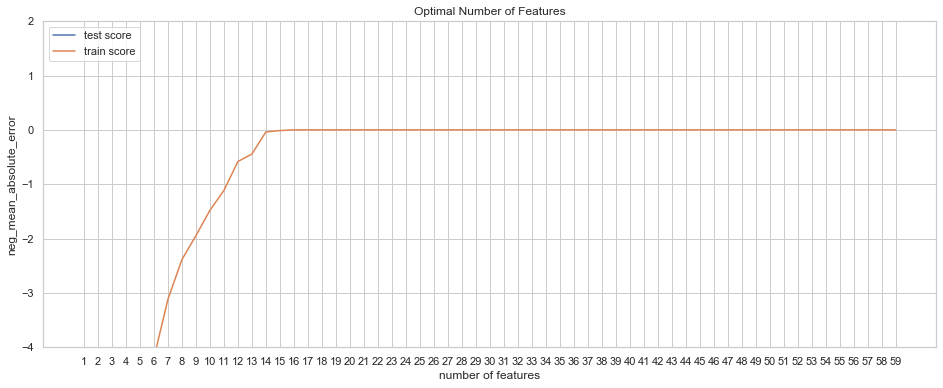

In [57]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xticks(list(range(1,60)),[str(i) for i in range(1,60)])
plt.ylim(-4, 2)
plt.xlabel('number of features')
plt.ylabel('neg_mean_absolute_error')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [58]:
# Who has the highest mean_test_score (negative mean squared error here)?
cv_results.sort_values('mean_test_score', ascending=False).head(5)
# The optimal n features = 53!

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
43,0.042012,0.000620,0.000201,1.322963e-05,44,{'n_features_to_select': 44},-18.142498,-37.591877,-41.412309,-29.739105,...,-29.616970,9.002986,1,-3.611926e-14,-3.854694e-14,-3.321787e-14,-1.995441e-14,-5.312417e-14,-3.619253e-14,1.062783e-14
39,0.045046,0.001054,0.000244,4.141912e-05,40,{'n_features_to_select': 40},-24.303541,-37.039902,-41.320043,-30.192504,...,-30.179121,8.403340,2,-3.422448e-14,-1.557273e-14,-1.983598e-14,-2.587560e-14,-3.436140e-14,-2.597404e-14,7.540427e-15
52,0.038653,0.000670,0.000212,3.456875e-05,53,{'n_features_to_select': 53},-21.686905,-38.499998,-40.993405,-29.684587,...,-30.382310,8.267327,3,-3.990882e-14,-2.030968e-14,-2.848092e-14,-5.524470e-14,-2.614575e-14,-3.401797e-14,1.237598e-14
38,0.044253,0.000744,0.000208,1.543995e-05,39,{'n_features_to_select': 39},-25.305614,-37.828084,-41.172562,-30.366051,...,-30.468687,8.475601,4,-2.759274e-14,-2.587560e-14,-2.090180e-14,-4.956036e-14,-1.704192e-14,-2.819448e-14,1.131196e-14
40,0.042975,0.000746,0.000195,8.395585e-07,41,{'n_features_to_select': 41},-25.606370,-37.876002,-41.004860,-30.058019,...,-30.489730,8.337557,5,-3.327708e-14,-3.179679e-14,-3.961276e-14,-3.688901e-14,-3.069767e-14,-3.445466e-14,3.319578e-15


In [59]:
#Now we can choose the optimal value of number of features and build a final model.
n_features_optimal = 44
X, y = my_data.drop(columns=['Sample_id', 'DistxDay']), my_data.DistxDay

lm = LinearRegression()
lm.fit(X_scaled, y)

rfe = RFE(lm, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_scaled, y)

In [60]:
# Summarize all features
rf_df = pd.DataFrame(rfe.support_, index=X.columns, columns=['Selected_or_not'])
# Select only the "True" (selected) ones
rf_df_t = rf_df[rf_df['Selected_or_not'] == True]
rf_df_t = rf_df_t.assign(Coefficient = rfe.estimator_.coef_) 
rf_df_t

,Selected_or_not,Coefficient
Perturbance_scale,True,2.255214
Akkermansia.muciniphila._Akkermansia.muciniphila.CAG.154_Akkermansia.sp..UNK.MGS.1_Akkermansia.sp..54_46_Akkermansia.sp..Phil8_Akkermansia.muciniphila_,True,-2.259411
Alistipes.finegoldii._Alistipes.finegoldii.CAG.68_Alistipes.finegoldii_Alistipes.sp..HGB5_,True,-2.689606
Alistipes.obesi,True,1.470576
Bacteroides.caecimuris,True,3.673418
Bacteroides.faecis_thetaiotaomicron._Bacteroides.sp..HMSC067B03_Bacteroides.sp..HMSC068A09_Bacteroides.sp..1_1_14_Bacteroides.faecis_Bacteroides.thetaiotaomicron_Bacteroides.sp..AR20_,True,1.837946
Bacteroides.massiliensis,True,1.855881
Bacteroides.sp.._Bacteroides.sp..HMSC073E02_Bacteroides.ovatus_Bacteroides.xylanisolvens_Bacteroides.sp..1_1_30_Bacteroides.sp..3_1_13_Bacteroides.sp..3_1_23_Bacteroides.sp..2_1_22_Bacteroides.sp..2_2_4_Bacteroides.sp..D1_Bacteroides.sp..D2_Bacteroides.sp..D22_Bacteroides.fragilis_,True,-2.694077
Barnesiella.intestinihominis._Bacteroides.sp..CAG.20_Bacteroides.sp..N54.MGS.20_Barnesiella.intestinihominis_,True,-2.126800
Blautia.massiliensis._Blautia.sp..KLE.1732_Blautia.sp..SF.50_Blautia.massiliensis_Ruminococcus.sp..SR1_5_uncultured.Blautia.sp._,True,-1.585497


Text(0.5, 0, 'Coefficient')

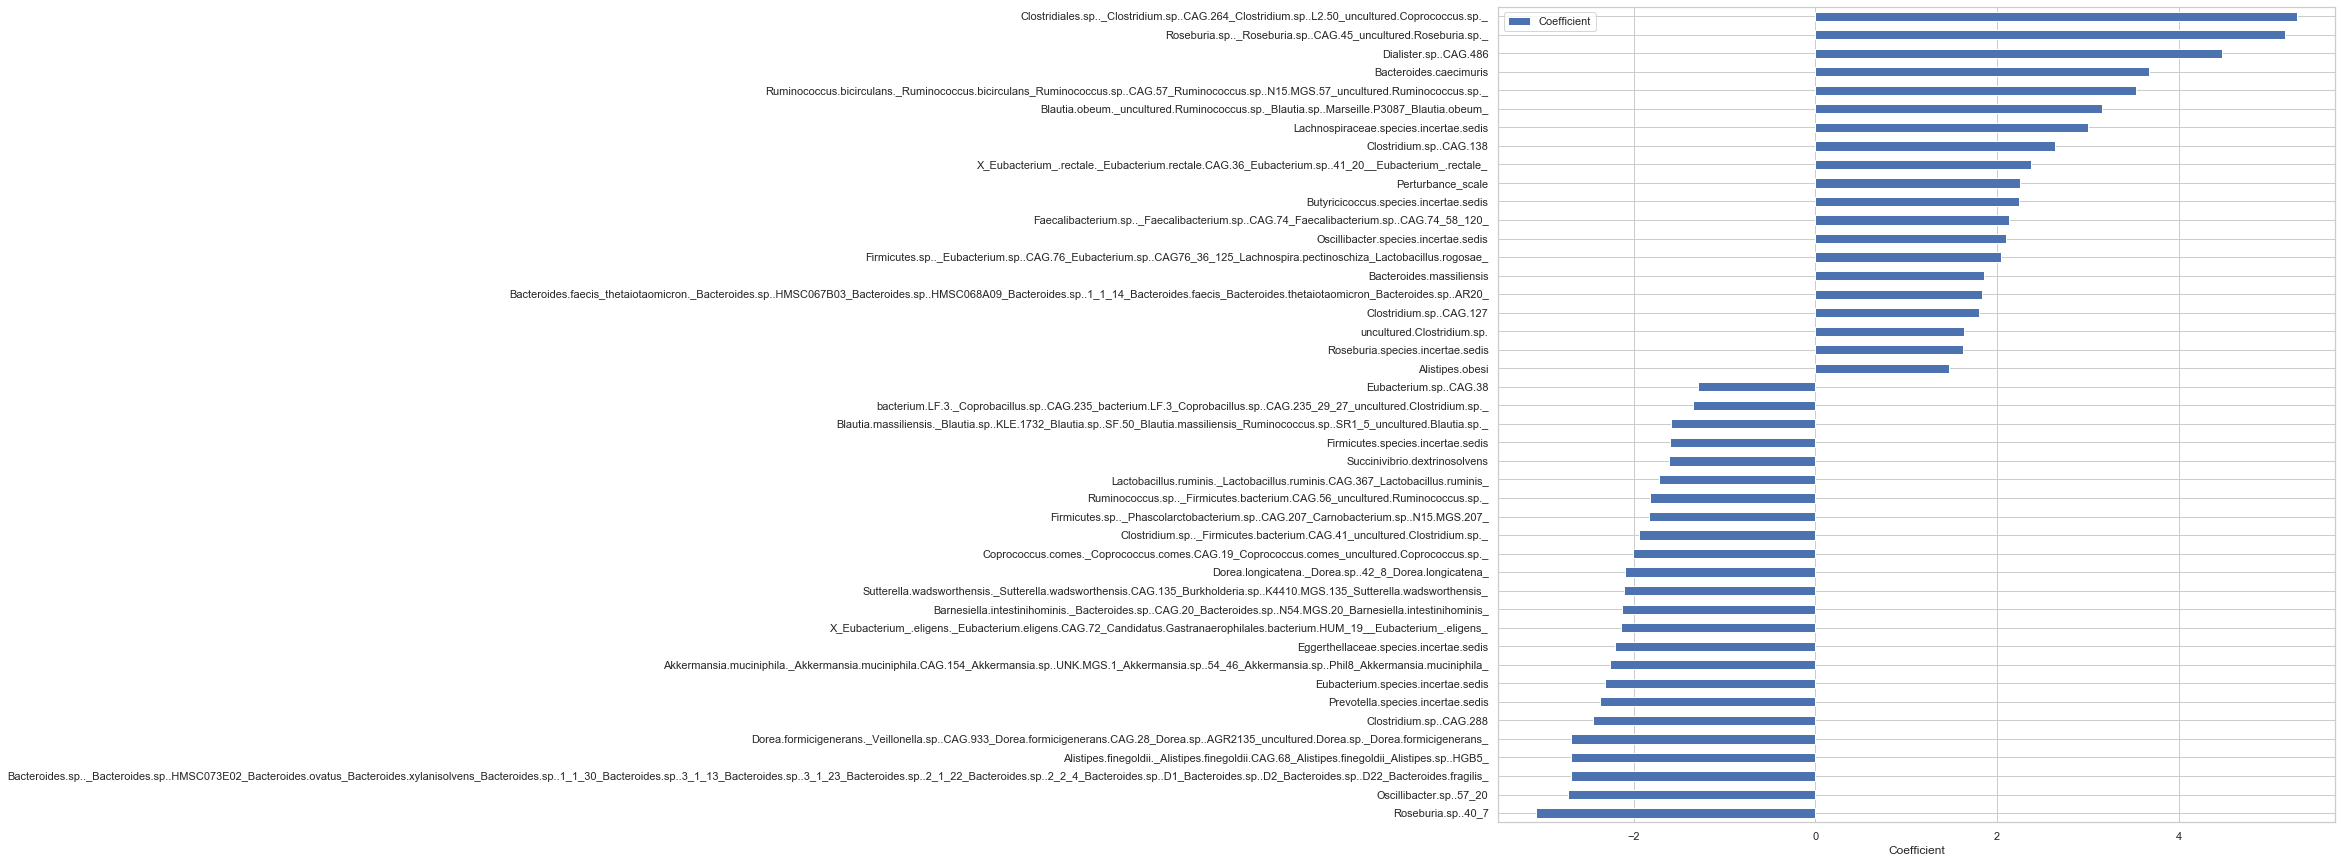

In [61]:
# Plot the coefficients
plt.rcParams['figure.figsize'] = [15, 15]
rf_df_t.sort_values('Coefficient').plot(kind='barh')
plt.xlabel("Coefficient")